Модифицированный алгоритм на базе Pytorch

In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.onnx
import torchvision
%matplotlib inline
plt.ion()  

C:\Users\MIXA\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = os.path.abspath(os.curdir)
data_dir=os.path.join(dir, "dsts\\")

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

In [4]:
def get_dataset(data_dir, data_transforms ):
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                              data_transforms[x])
                      for x in ['train', 'test']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'test']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
    classes = image_datasets['train'].classes

    return dataloaders["train"], dataloaders['test'], classes, dataset_sizes

In [5]:

trainloader, testloader, classes, dataset_sizes=get_dataset(data_dir,data_transforms)
print('Classes: ',  classes)
print('The datasest have: ',  dataset_sizes ," images")

Classes:  ['airplane', 'bike', 'gitar', 'notebook', 'weapon']
The datasest have:  {'train': 398, 'test': 100}  images


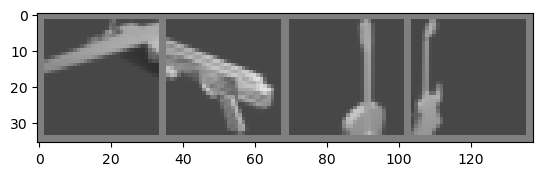

airplane weapon gitar gitar


In [6]:
def imshow(img):
    img = img / 2+0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.bn2 = nn.BatchNorm2d(32)   
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
import torch.optim as optim
net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.003)

In [8]:
device = torch.device("cpu")

correct = 0
total = 0
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 15 == 14:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 15))
            running_loss = 0.0

    accuracy = correct / total
    print('Accuracy of the network after epoch %d: %d %%' % (epoch + 1, 100 * accuracy))

print('Finished Training')


[1,    15] loss: 1.498
[1,    30] loss: 1.466
[1,    45] loss: 1.242
[1,    60] loss: 1.193
[1,    75] loss: 1.124
[1,    90] loss: 1.392
Accuracy of the network after epoch 1: 48 %
[2,    15] loss: 1.196
[2,    30] loss: 1.130
[2,    45] loss: 0.887
[2,    60] loss: 1.062
[2,    75] loss: 1.033
[2,    90] loss: 1.025
Accuracy of the network after epoch 2: 53 %
[3,    15] loss: 1.119
[3,    30] loss: 0.764
[3,    45] loss: 0.822
[3,    60] loss: 0.626
[3,    75] loss: 0.801
[3,    90] loss: 0.973
Accuracy of the network after epoch 3: 58 %
[4,    15] loss: 0.727
[4,    30] loss: 0.660
[4,    45] loss: 0.732
[4,    60] loss: 0.614
[4,    75] loss: 0.668
[4,    90] loss: 0.735
Accuracy of the network after epoch 4: 62 %
[5,    15] loss: 1.065
[5,    30] loss: 0.767
[5,    45] loss: 0.606
[5,    60] loss: 0.815
[5,    75] loss: 0.641
[5,    90] loss: 0.556
Accuracy of the network after epoch 5: 64 %
[6,    15] loss: 0.557
[6,    30] loss: 0.555
[6,    45] loss: 0.512
[6,    60] loss: 0.41

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.6195, -2.2413, -6.4445, -2.6814, -0.1170])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.8504, -0.9996,  2.7576,  0.0534, -1.0419])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.5486,  0.1645, -2.5726, -0.6558,  0.7750])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.0574, -2.2864, -2.3773,  4.0573, -3.2748])


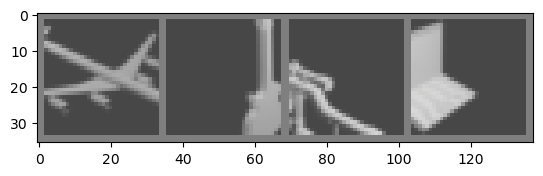

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.6022,  0.6996, -9.8386, -7.9017,  5.1804])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.6623, -0.6559,  2.0406, -0.0186, -0.7229])
Predict class - weapon, real class - airplane, probability (airplane,bike) - tensor([ 1.6395,  0.1118, -7.9382, -5.3808,  3.1039])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.8785, -1.8603, -3.8673,  4.9412, -3.8224])


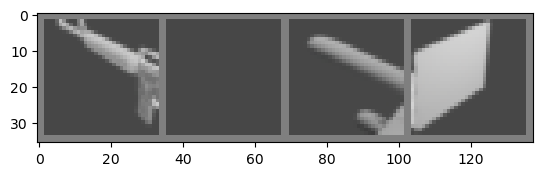

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-0.7413,  2.2192, -3.9472, -0.7876, -1.8253])
Predict class - bike, real class - weapon, probability (airplane,bike) - tensor([ 1.0484,  1.8899, -6.9561, -4.9908,  1.2968])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.3018,  0.0211, -2.5881,  3.0624, -2.0477])
Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([ 1.4579,  0.7992, -5.8303, -3.6291,  0.8837])


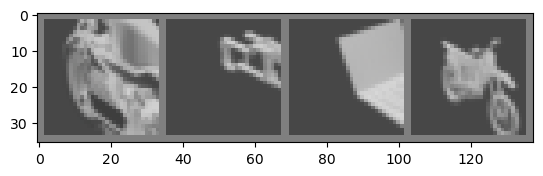

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.3291, -0.8140,  2.9764, -1.2318, -1.3007])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.2667, -0.4179, -2.6904,  2.7466, -1.8001])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 0.4350,  3.4912, -5.8028, -3.2610, -0.0431])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0161, -0.6938,  2.0115, -1.7111, -1.0248])


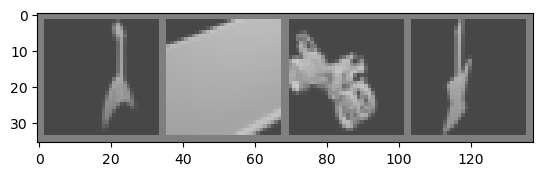

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 0.4460,  0.7240, -1.2581, -1.1429,  0.3077])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 1.5728, -1.5692, -4.5412,  1.8409, -3.6395])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-0.8900,  0.5598, -1.4466, -0.9340,  0.3046])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 1.0606,  0.4025, -9.1305, -6.6632,  5.7254])


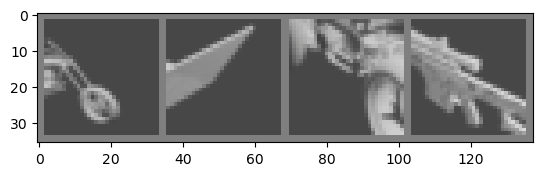

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.5790, -0.4982,  3.6190, -2.4565, -1.2380])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.1814, -0.4611,  2.7788, -1.2494, -0.9864])
Predict class - airplane, real class - notebook, probability (airplane,bike) - tensor([ 2.9575, -2.1019, -5.5959,  1.5479, -4.2969])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.1992,  0.9440, -5.2181,  4.9222, -4.6258])


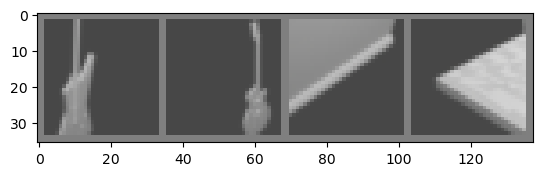

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.9497, -0.7466,  3.1586, -0.7676, -1.3848])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.2014, -0.6919,  1.8896, -0.3054, -0.4712])
Predict class - weapon, real class - notebook, probability (airplane,bike) - tensor([ 0.9946,  0.0751, -6.9428, -4.6965,  3.2193])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 0.2859,  3.7727, -6.1770, -4.1390,  1.9578])


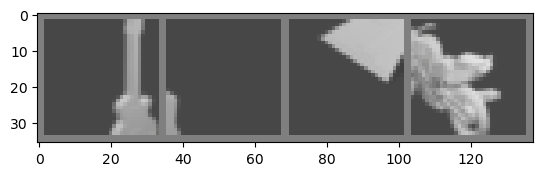

Predict class - notebook, real class - bike, probability (airplane,bike) - tensor([-0.4754, -0.5147, -2.7570,  3.0202, -2.0292])
Predict class - gitar, real class - bike, probability (airplane,bike) - tensor([-2.0904,  0.7048,  1.4431, -3.4612, -0.7341])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.2961,  0.1592, -3.9495,  3.7785, -4.3412])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 0.0701,  2.2863, -2.0777, -2.9352, -0.2658])


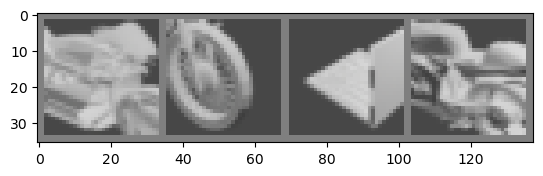

Predict class - airplane, real class - notebook, probability (airplane,bike) - tensor([ 2.3784, -1.9644, -4.8571,  2.2007, -3.7215])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 1.1038, -0.4864, -9.6550, -6.9454,  5.7314])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.9341,  3.2553, -3.8262, -1.2060, -0.1733])
Predict class - gitar, real class - bike, probability (airplane,bike) - tensor([-1.1894,  0.7554,  0.9893, -0.5601, -0.9574])


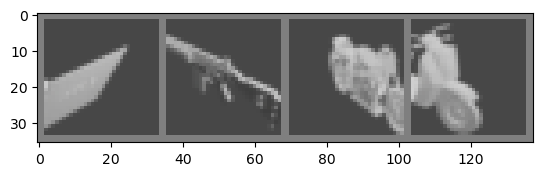

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.9536,  0.7277, -5.6054, -4.1389,  1.6975])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-2.9359,  4.2227, -3.3653, -1.8337, -1.7591])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.5404, -2.3141, -8.4956, -0.7594, -4.1562])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.3218, -0.7086, -2.1034,  2.5642, -1.8025])


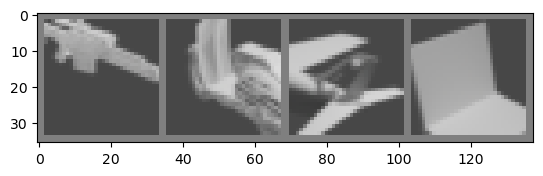

Predict class - notebook, real class - gitar, probability (airplane,bike) - tensor([-0.5612, -0.4072,  0.4397,  0.4856, -0.5867])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ -0.1428,   5.1276, -11.9234,  -6.5217,   1.3449])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.0041, -0.8550,  2.1579, -0.5256, -1.5194])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.5310, -1.0974,  3.5376, -0.9241, -1.4754])


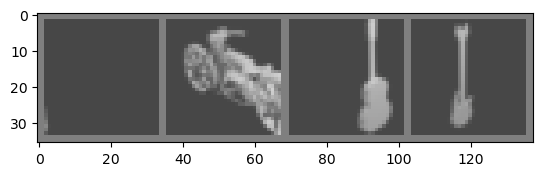

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.9341,  0.1266, -9.9852, -7.2815,  5.9337])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.0531, -1.4486, -7.6760, -1.5191, -2.0768])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.1597, -0.9212, -4.1656, -1.8751, -1.7748])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-2.2858, -0.9144,  2.4812,  0.2462, -0.7745])


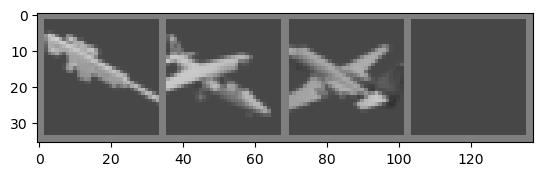

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-1.3258, -0.6183, -3.9268,  5.7939, -3.9797])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.9538, -0.3462,  1.9239, -1.1676, -0.8904])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 1.4510, -2.6773, -5.2557,  3.0699, -3.3665])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.4601, -1.0259, -3.5456,  1.2914, -1.3763])


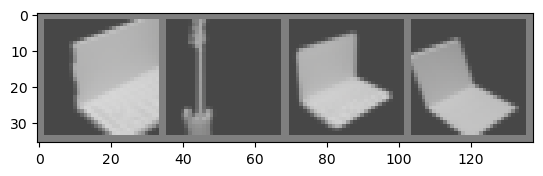

Predict class - weapon, real class - airplane, probability (airplane,bike) - tensor([ 1.6824, -1.1134, -5.9046, -1.4076,  1.8856])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.2999,  4.0656, -8.4582, -4.9110,  2.1422])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0867, -1.4669,  4.9652, -1.4488, -3.0884])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-0.7798, -0.9595,  1.4438,  0.6305, -1.3060])


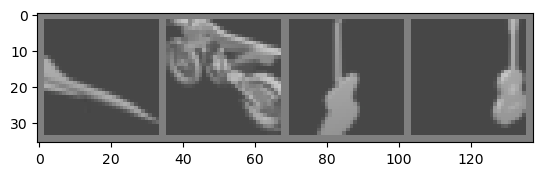

Predict class - weapon, real class - bike, probability (airplane,bike) - tensor([ 0.2170,  0.3010, -4.9168, -4.1033,  2.2871])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.3671, -1.3371, -5.5056, -0.3135, -2.7891])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.1044, -1.1163,  4.9553, -1.4682, -2.1615])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 0.5127,  1.6802, -2.7782, -2.0636,  0.9107])


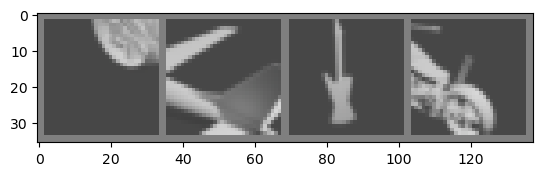

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.6691, -1.4022, -2.7995,  3.2046, -2.1691])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.4562, -1.7062, -5.6950, -2.2822, -0.8630])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 1.2244, -0.0322, -4.3382, -2.2479,  2.0469])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.5963, -0.7575,  1.8759, -0.3769, -0.3768])


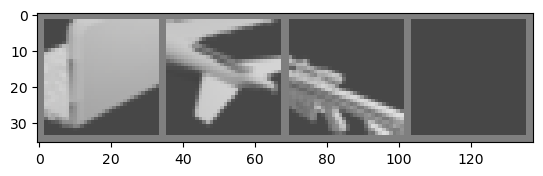

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.5839, -0.7412,  2.1307,  0.0075, -0.7639])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.8513, -0.8338, -6.7399, -3.6786,  3.9328])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.3195, -0.8862, -9.2625, -4.1149,  1.2782])
Predict class - gitar, real class - bike, probability (airplane,bike) - tensor([-2.0738, -0.1221,  2.0027, -1.5034, -0.1973])


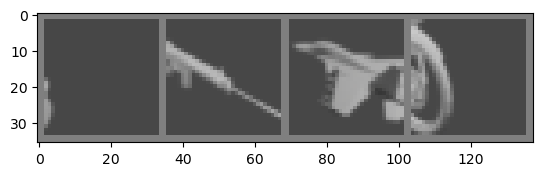

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-2.2957, -0.8509,  2.5740,  0.0647, -0.8385])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 1.8842, -0.3296, -6.2749, -3.2076,  1.2777])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.9032, -0.6144, -6.8310, -4.0551,  3.8746])
Predict class - bike, real class - airplane, probability (airplane,bike) - tensor([ 0.0696,  0.8456, -2.9093,  0.0692, -1.8134])


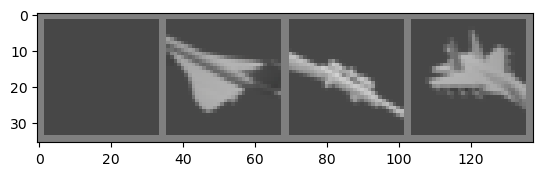

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 0.0406,  4.2527, -4.4391, -3.2345,  0.4286])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.4235,  1.6432, -2.2849, -2.7362,  0.2314])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.3261, -0.3487, -3.1886, -3.1778,  1.8499])
Predict class - airplane, real class - weapon, probability (airplane,bike) - tensor([ 1.0431, -1.0564, -3.6193, -1.1634,  0.9750])


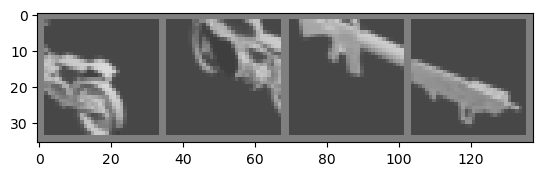

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-1.3076,  2.0399, -4.6560, -3.7089,  2.2715])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 2.9738, -1.1759, -2.7817, -1.6531, -1.7907])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 2.6646, -1.3807, -4.3272, -0.9930, -1.0819])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.2073,  0.7627, -7.7876, -6.7807,  3.7509])


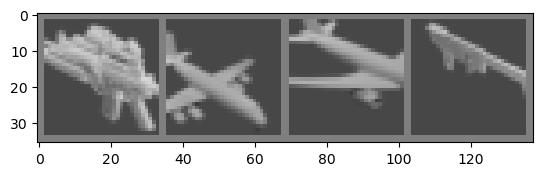

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.0797, -3.2341, -5.0963,  4.6214, -3.2598])
Predict class - notebook, real class - airplane, probability (airplane,bike) - tensor([-0.5828,  0.7177, -1.6004,  1.0206, -0.8104])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([-0.2478,  0.0052, -4.9935, -4.4640,  3.2942])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 1.4229, -0.9134, -2.0734,  1.1175, -2.0209])


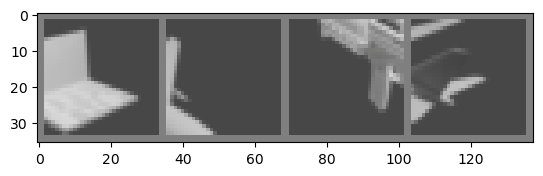

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.2183, -1.4089, -4.8812, -1.0183, -2.0842])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.9879, -1.7979, -4.1505, -2.4391, -1.5661])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.8774, -0.2223, -3.0067,  3.2310, -2.0933])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([-0.3162, -0.6725, -3.1149,  4.8420, -4.1657])


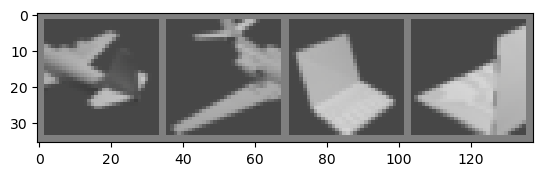

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([-1.2869, -1.0862,  4.1948, -0.9148, -1.6991])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.7568,  0.6992, -5.7941, -3.1514,  3.3956])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.0127, -0.0643, -2.8025, -2.8873,  1.4344])
Predict class - notebook, real class - airplane, probability (airplane,bike) - tensor([ 0.5948, -1.0027, -3.0377,  2.5202, -3.4764])


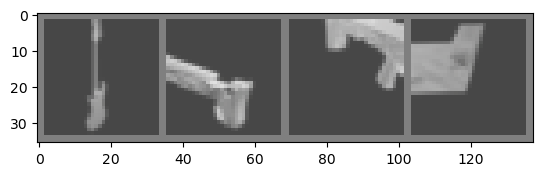

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.1878,  1.0048, -9.7149, -7.8264,  5.7089])
Predict class - bike, real class - weapon, probability (airplane,bike) - tensor([ 0.5514,  1.3929, -2.7300, -1.4533, -0.2400])
Predict class - gitar, real class - airplane, probability (airplane,bike) - tensor([-1.4140, -0.9541,  1.9586,  0.2199, -0.5722])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 2.4710, -1.6799, -5.7893, -0.4016, -1.0472])


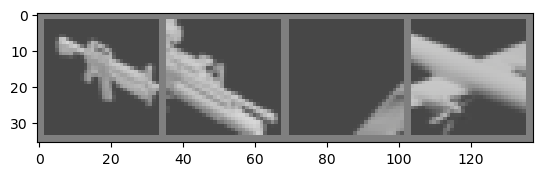

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.3229, -2.1684, -3.9570,  4.3440, -3.5083])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 0.8010, -0.0179, -6.7392, -5.3568,  3.3525])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([-1.7655,  2.5194, -2.5847, -3.3240,  0.6030])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.4908, -2.2409, -3.2847,  2.5372, -2.2116])


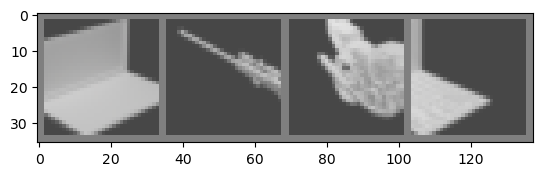

Accuracy of the network on the 100 test images: 81 %


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        for printdata in list(zip(predicted,labels,outputs)):
            printclass =[classes[int(printdata[0])],classes[int(printdata[1])]]
            print('Predict class - {0}, real class - {1}, probability ({2},{3}) - {4}'.format( printclass[0],printclass[1],
                                                                              classes[0], classes [1],printdata[2]))

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        imshow(torchvision.utils.make_grid(images))
print('Accuracy of the network on the', dataset_sizes['test'], 'test images: %d %%' % (
    100 * correct / total))

In [10]:

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 70.0 %
Accuracy for class: bike  is 60.0 %
Accuracy for class: gitar is 90.0 %
Accuracy for class: notebook is 90.0 %
Accuracy for class: weapon is 80.0 %
